In [1]:
import pandas as pd


In [2]:
train_df = pd.read_csv("./titanic/train.csv")

In [3]:
test_df = pd.read_csv("./titanic/test.csv")

In [4]:
import numpy as np

In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt 


In [6]:
##for uniform pre-processing I concat all data under one df
train_df['train_test'] = 1
test_df['train_test'] = 0
test_df['Survived'] = np.nan
df = pd.concat([train_df,test_df])
%matplotlib inline
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [10]:
tdf = train_df
tdf.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [11]:
tdf_num = tdf[['Age', 'SibSp', 'Parch','Fare']]

In [12]:
tdf_cat = tdf[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

In [13]:
tdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


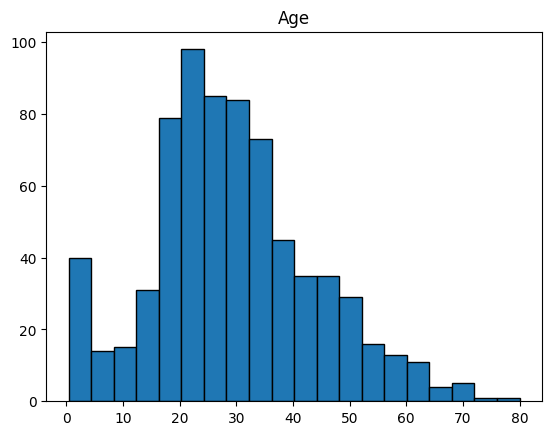

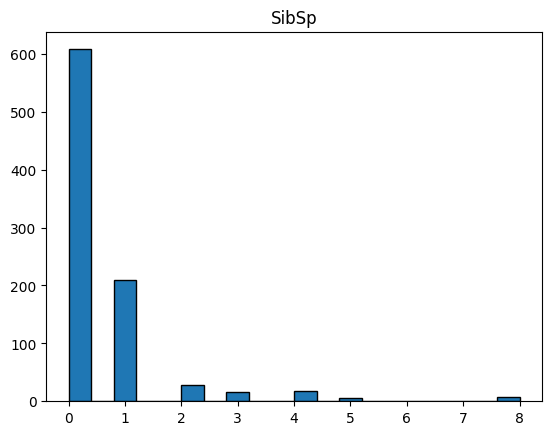

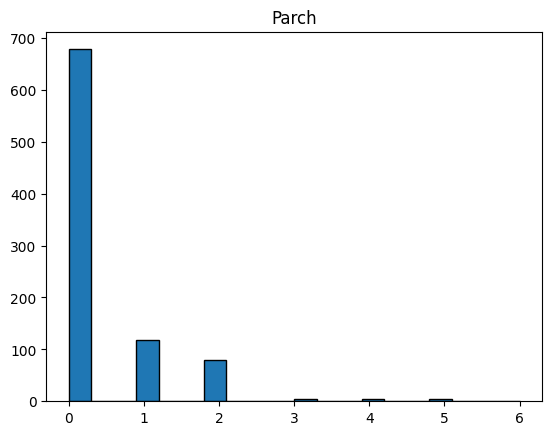

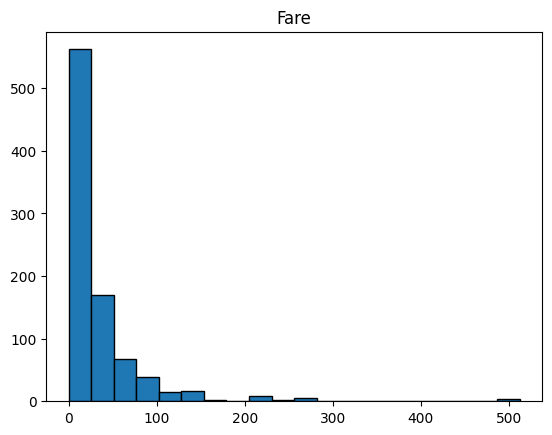

In [14]:
for col in tdf_num.columns:
    plt.title(col)
    plt.hist(tdf_num[col],edgecolor = 'black',bins= 20)
    plt.show()

In [15]:
tdf_num.corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


<Axes: >

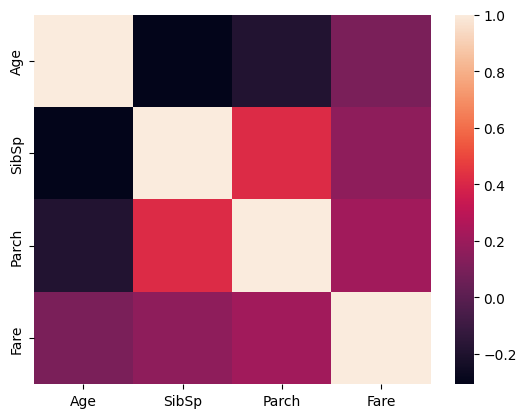

In [16]:
sns.heatmap(tdf_num.corr())

In [17]:
pd.pivot_table(tdf , values = ['Age','SibSp','Parch','Fare'],index = 'Survived')

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


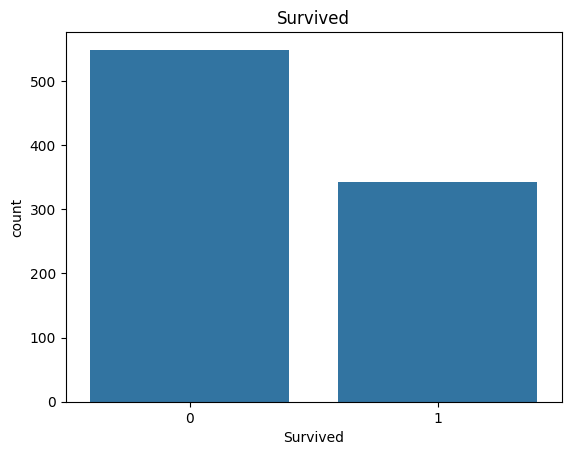

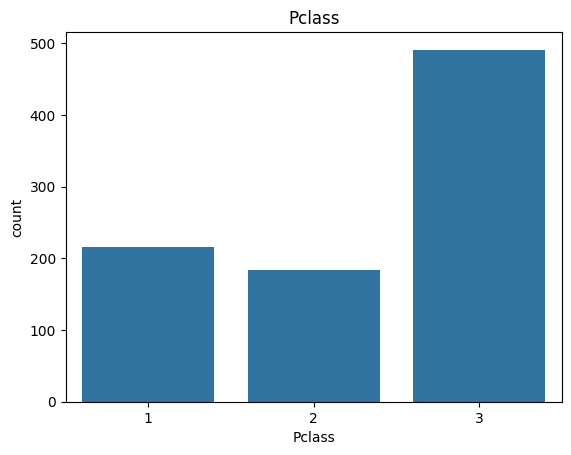

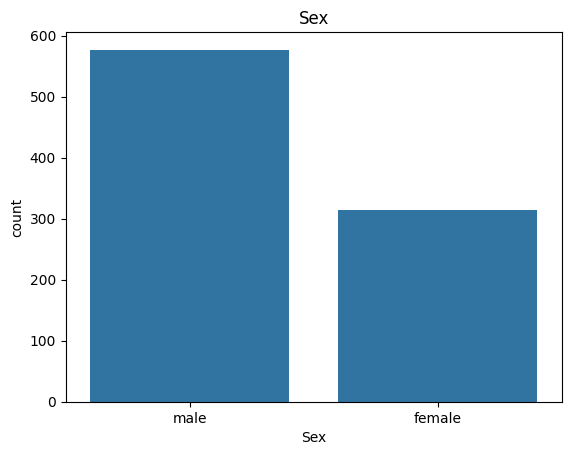

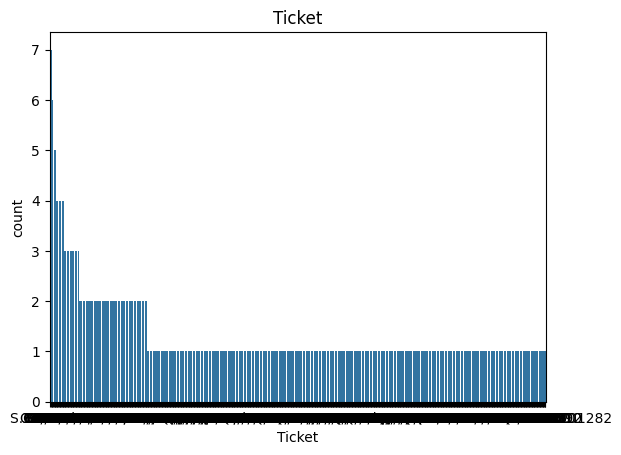

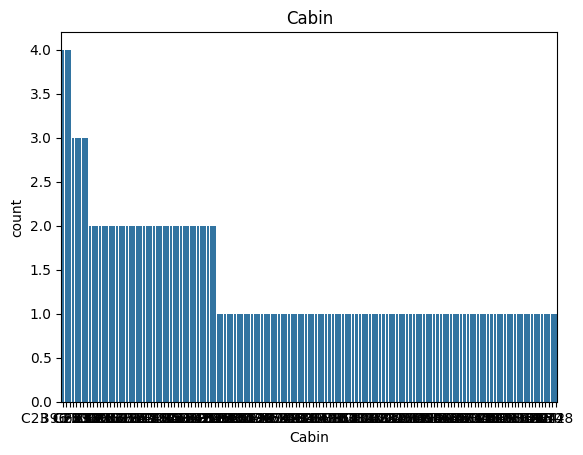

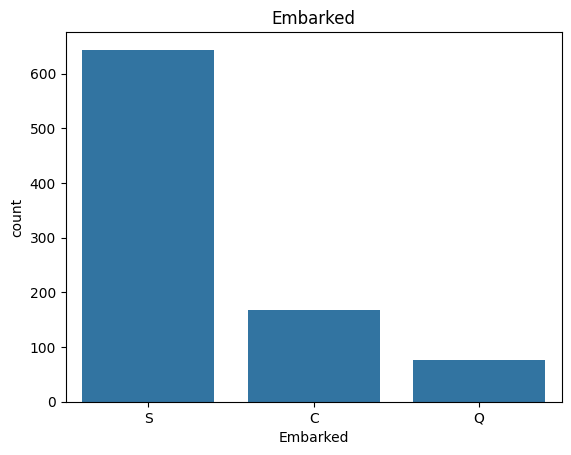

In [18]:
for i in tdf_cat.columns:
    sns.barplot(x =tdf_cat[i].value_counts().index, y = tdf_cat[i].value_counts()).set_title(i)
    # plt.hist(tdf_cat[i],edgecolor = 'black')
    # plt.title(i)
    plt.show()

In [19]:
pd.pivot_table(tdf,index='Survived', columns='Pclass',values='Ticket', aggfunc='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [20]:
pd.pivot_table(tdf,index='Survived', columns='Sex',values='Ticket', aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [21]:
pd.pivot_table(tdf,index='Survived', columns='Embarked',values='Ticket', aggfunc='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [22]:
tdf.Embarked.value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [23]:
tdf.Cabin.value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [24]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,0


In [25]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [26]:
tdf['Cabin_multiples'] = tdf.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [27]:
tdf.Cabin_multiples.value_counts()

Cabin_multiples
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [28]:
pd.pivot_table(tdf,index='Survived', columns='Cabin_multiples',aggfunc='count',values='Ticket')

Cabin_multiples,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [29]:
tdf['Cabin_adv'] = tdf.Cabin.apply(lambda x: str(x)[0])
tdf.Cabin_adv.value_counts()

Cabin_adv
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [30]:
pd.pivot_table(tdf,index='Survived', columns='Cabin_adv',aggfunc='count',values='Ticket')

Cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [31]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [32]:
tdf.Cabin_multiples.unique()

array([0, 1, 3, 2, 4])

In [33]:
# creating categorical cols for full data train+test
#number of cabins
df['Cabin_multiples'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
#cabin letters
df['Cabin_adv'] = df.Cabin.apply(lambda x: str(x)[0])
#ticket letters(non numeric)
df['ticket_letters'] = df.Ticket.apply(
    lambda x: ''.join(x.split(' ')[:-1])
                    .replace('.', '')          
                    .replace('/', '')        
                    .lower()                  
              if len(x.split(' ')[:-1]) > 0 else 0                          
)
df['numeric_ticket'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
#taking title such as Mr. Mrs. etc
df['name_title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())


In [34]:
df.Age = df.Age.fillna(tdf.Age.mean()) 
df.Fare = df.Fare.fillna(tdf.Fare.mean()) 
df.dropna(subset=['Embarked'], inplace=True)  

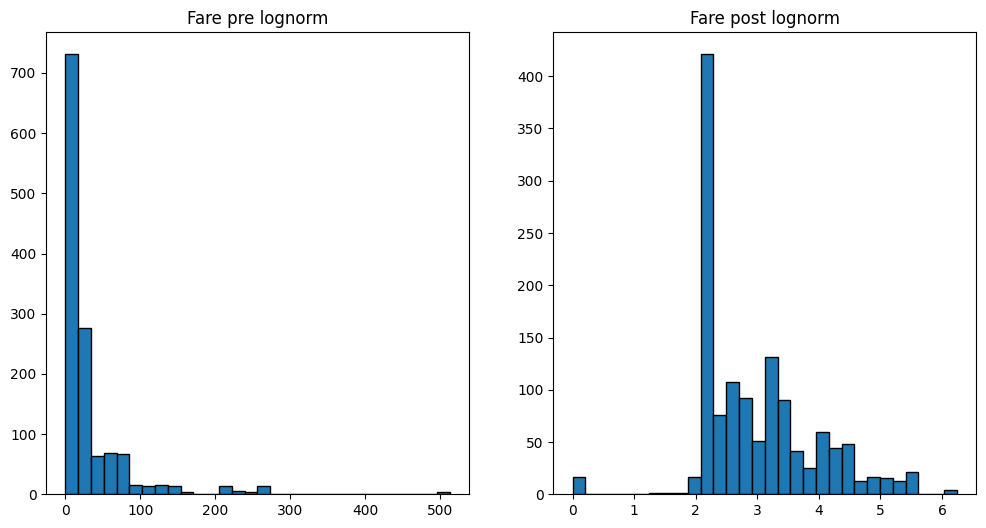

In [35]:
#log norm of fare, its very skewed to 0
import numpy as np
fig,axes = plt.subplots(1,2,figsize =(12,6) )
axes[0].hist(df['Fare'],edgecolor= 'black',bins =30)
axes[0].set_title('Fare pre lognorm')
df['norm_fare'] = np.log(df.Fare+1)
axes[1].hist(df['norm_fare'],edgecolor='black',bins = 30)
axes[1].set_title('Fare post lognorm')
plt.show()

In [36]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
categorical_cols = ['Pclass', 'Sex', 'Embarked', 'Cabin_adv', 
                    'Cabin_multiples', 'numeric_ticket', 'name_title', 'train_test']
numerical_cols = ['Age', 'SibSp', 'Parch', 'norm_fare']
all_features = categorical_cols + numerical_cols
X = df[all_features]

In [37]:
X.train_test.value_counts()


train_test
1    889
0    418
Name: count, dtype: int64

In [38]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
         ('num', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'  # numeric columns pass through unchanged
)
X_processed = preprocessor.fit_transform(X)
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = list(cat_features) + list(numerical_cols)
X_df = pd.DataFrame(X_processed.toarray(), columns=all_features)  # for OneHotEncoder sparse output
train_mask = X['train_test'] == 1
test_mask = X['train_test'] == 0

X_train = X_df[train_mask.values].reset_index(drop=True)
X_test = X_df[test_mask.values].reset_index(drop=True)


y_train = df[df.train_test == 1].Survived


from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)


In [40]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)
y_pred = model.predict(X_train)

In [42]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y_pred,y_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87       549
         1.0       0.80      0.77      0.79       340

    accuracy                           0.84       889
   macro avg       0.83      0.83      0.83       889
weighted avg       0.84      0.84      0.84       889



In [43]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87       549
         1.0       0.80      0.77      0.79       340

    accuracy                           0.84       889
   macro avg       0.83      0.83      0.83       889
weighted avg       0.84      0.84      0.84       889



In [44]:
y_pred_test = model.predict(X_test)

# Build the submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],   # MUST come from the actual test.csv
    'Survived': y_pred_test.astype(int)      # Ensure it's 0 or 1 as integers
})

# Save to CSV — exactly 418 rows, no index column
submission.to_csv("submission.csv", index=False)


In [ ]:
## 77.033 % accuracy on the official website

In [46]:
test_df.Survived

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
413   NaN
414   NaN
415   NaN
416   NaN
417   NaN
Name: Survived, Length: 418, dtype: float64

In [48]:
df2 = pd.read_csv('./titanic/gender_submission.csv')

In [49]:
y_test = df2.Survived

In [51]:
accuracy_score(y_test,y_pred_test), ##91.8 with attached dataset result (best prediction)

0.9186602870813397